
### Problem Statement
1. **Objective:** Predict which customers will make a transaction in the future (target column: `1` for will transact, `0` for won't transact).
2. **Dataset:** Includes 200 anonymized features, an `ID_code` column, and a `target` column.

### Tasks
1. **Data Analysis Report:** Analyze the dataset and provide insights.
2. **Predictive Model:** Build and compare models to predict customer transactions.
   - Deliver a report on the performance of multiple models.
   - Recommend the best model for production.
3. **Challenges Report:** Document challenges encountered and methods/techniques used to address them.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train(1).csv')

In [3]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [5]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


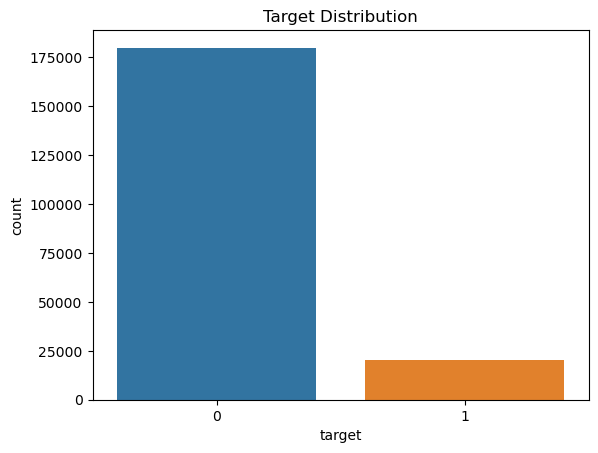

In [6]:
sns.countplot(x='target',data=data)
plt.title("Target Distribution")
plt.show()

Spliting data into features(x) and target(y)

In [7]:
x = data.drop(['ID_code', 'target'], axis = 1)
y = data['target']

Spliting into training and testing sets

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42,)

In [9]:
print("X_train:", x_train.shape)
print("X_test:", x_test.shape)
print("Y_train:", len(y_train))
print("Y_test:", len(y_test))

X_train: (160000, 200)
X_test: (40000, 200)
Y_train: 160000
Y_test: 40000


# Logistic Regression Model

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [11]:
#Initializing and training the model
logR = LogisticRegression(max_iter=1000, random_state=42)
logR.fit(x_train, y_train)

C:\Users\nakandinda\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [12]:
#Predictions on test data
y_pred = logR.predict(x_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
#Evaluation on the train data
print(logR.score(x_train,y_train))
print(logR.score(x_test,y_test))

0.91445
0.9129


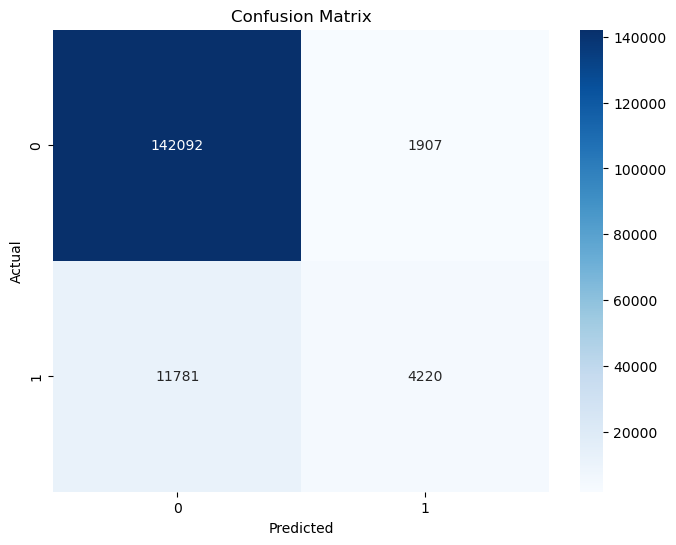

In [14]:
#Generating a confusion matrix
cm = confusion_matrix(y_train,y_pred)

#Ploting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt ='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
#Fitting the Linear Regression Model using statsmodel
import statsmodels.api as sm
#Building the model
log_reg = sm.Logit(endog = y, exog = x)
#fitting the data
log_reg = log_reg.fit()


Optimization terminated successfully.
         Current function value: 0.231171
         Iterations 8


In [16]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               200000
Model:                          Logit   Df Residuals:                   199800
Method:                           MLE   Df Model:                          199
Date:                Wed, 08 Jan 2025   Pseudo R-squ.:                  0.2912
Time:                        09:46:30   Log-Likelihood:                -46234.
converged:                       True   LL-Null:                       -65232.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          0.0551      0.003     19.699      0.000       0.050       0.061
var_1          0.0406      0.002     19.068      0.000       0.036       0.045
var_2          0.0658      0.003     20.439      0.0

In [17]:
odds_ratios = pd.DataFrame({"Odds Ratio": log_reg.params})

odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

         Odds Ratio
var_0      1.056666
var_1      1.041456
var_2      1.068017
var_3      1.017777
var_4      1.023990
...             ...
var_195    1.069656
var_196    1.013687
var_197    0.877500
var_198    0.944353
var_199    1.007894

[200 rows x 1 columns]


In [18]:
#Due to occurence of many predictors, We use Lasso Regression for feature selection to eliminate less important features
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [19]:
#Scale features and apply lasso(Least Absolute Shrinkage and Selection Operator)
lasso_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LogisticRegression(penalty='l1', solver='saga', max_iter=1000, C=0.01)) #L1 penalty for Lasso
])

lasso_model.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 LogisticRegression(C=0.01, max_iter=1000, penalty='l1',
                                    solver='saga'))])

In [20]:
#Get coefficients
lasso_coefficients = lasso_model.named_steps['lasso'].coef_[0]
important_features = x.columns[lasso_coefficients !=0]
print("Important Features:", important_features)

Important Features: Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_8',
       'var_9', 'var_11',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=190)


#### Conclusion and challenges
**Anonymized Features:**
Without meaningful feature names, it was difficult to interpret
Too many important features to choose from, need for use of an extensive model for proper performance.
Let us use Random Forest Algorithm as a check on the challenge


# Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
#Initialize and train the model
Rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
Rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [22]:
#Predictions
y_pred_Rf = Rf_model.predict(x_test)
print(y_pred_Rf)

[0 0 0 ... 0 0 0]


In [23]:
#Evaluation
print("Random Forest Performance")
print(classification_report(y_test, y_pred_Rf))

Random Forest Performance
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       1.00      0.00      0.00      4097

    accuracy                           0.90     40000
   macro avg       0.95      0.50      0.47     40000
weighted avg       0.91      0.90      0.85     40000



In [24]:
print(y_train.value_counts())

0    143999
1     16001
Name: target, dtype: int64


Challenges:
The model is achieving high precision for both classes, but the recall for class 1 is very low. This suggests that the model is predicting almost all customers as class 0 (no transaction) likely due to class imbalance in the dataset.

# Gradient Boosting Model

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
Gb_model = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.1, random_state=42)
Gb_model.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [26]:
#Predictions
y_pred_GB = Gb_model.predict(x_test)
print(y_pred_GB)

[0 0 0 ... 0 0 0]


In [27]:
#Evaluation
print("Gradient Boost Performance")
print(classification_report(y_test, y_pred_GB))

Gradient Boost Performance
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.85      0.03      0.06      4097

    accuracy                           0.90     40000
   macro avg       0.88      0.52      0.50     40000
weighted avg       0.90      0.90      0.86     40000



The dataset is highly imbalanced, with 35,903 instances of Class 0 and only 4,097 instances of Class. Leading to the model prioritizing accuracy for the majority class (0).
Poor recall for the minority class (1). To curb this, we will use XGBoost that handles inbalanced datasets better

# XGBoost Algorithm

In [28]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Calculate scale_pos_weight to handle class imbalance
class_0_count = (y == 0).sum()
class_1_count = (y == 1).sum()
scale_pos_weight = class_0_count / class_1_count

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,          # Number of trees
    learning_rate=0.1,         # Step size shrinkage
    max_depth=6,               # Maximum depth of a tree
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    random_state=42,           # Reproducibility
    use_label_encoder=False    # Avoid label encoding warnings
)

# Fit the model
xgb_model.fit(x_train, y_train)

# Make predictions
y_pred = xgb_model.predict(x_test)
y_pred_proba = xgb_model.predict_proba(x_test)[:, 1]

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC-AUC Score:", roc_auc)


C:\Users\nakandinda\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [14:03:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[31092  4811]
 [ 1404  2693]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     35903
           1       0.36      0.66      0.46      4097

    accuracy                           0.84     40000
   macro avg       0.66      0.76      0.69     40000
weighted avg       0.90      0.84      0.86     40000


ROC-AUC Score: 0.853077993194189


#### Key Observations
Improved Minority Class Performance:

The recall for Class 1 (0.66) is much better than previous models (i.e., Logistic Regression, Random Forest and Gradient Boosting). This indicates the model is identifying more minority class instances.
Trade-off for Majority Class:

Precision and recall for Class 0 decreased slightly due to the focus on balancing performance for both classes.
Imbalance Handling:

The use of scale_pos_weight in XGBoost has helped improve Class 1 recall while maintaining a good ROC-AUC score.

### Challenges Faced and Solutions During Modelling
**Anonymized Features:**
   - Without meaningful feature names, it was difficult to interpret the model or feature importance.
   - Solution: We focused on model performance rather than interpretability.

**Class Imbalance:**
   - the dataset is was found to imbalanced and the performance skewed towards the majority class.
   - Solution: Used XGBoost Algorithm that helped improve class 1 recall while maintaing a good ROC-AUC score.

**Model Complexity:**
   - Gradient boosting models are more computationally intensive though they produce good results


### Conclusion

**Appropriate model to use and deploy would be the XGBoost that performed better than the rest in all parameters**